<a href="https://colab.research.google.com/github/GustavoDavila77/Curso-de-introducci-n-al-machine-learning/blob/master/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch #Libreria Pytorch para el uso de la IA

from torchvision import utils #la utilizamos para optner la red neuronal
from torchvision import models #Contiene los modelos de IA que se utilizarán
from torchvision import datasets #para trabajar con los datasets
from torchvision import transforms #para trabajar con imagenes Aplica las transofrmaciones para un entrenamiento más eficiente

from PIL import Image #Para manejo de imagenes, como abrir una dirección
import urllib.request as request #Se utiliza para la apertura de las urls donde se encuentre la imagen
from matplotlib import pyplot as plt #Librería para gráficas

#Modelo Inception para Visión artificial

In [0]:
#inception es un modelo de visión por computador
#este cuenta con una etiquetas para reconocer una gran cantidad de elementos
model = models.inception_v3(pretrained=True) #Se carga el modelo de IA ya previamente entrenado

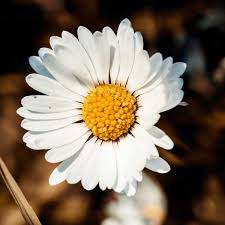

In [0]:
#Se inicia la apertura de la imagen para ingresar en el modelo de inception
#url = 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12130118/Golden-Retriever-Standing1.jpg' #URL de la imagen
#url = 'https://cnnespanol2.files.wordpress.com/2017/06/160222154959-consumer-reports-2016-subaru-forester-780x439.jpg?quality=100&strip=all&strip=info' #img de un carro
url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhMVFRUVFRUVFxUVFRUVFRUVFxUXFxcXFhcYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0lHSUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYHAQj/xAA/EAABAwIDBQYDBAkEAwEAAAABAAIDBBESITEFBkFRYQcTIjJxgZGhsRRSwdEjM0JicpKy4fAWgtLxFTTCU//EABoBAAMBAQEBAAAAAAAAAAAAAAECAwQABQb/xAAoEQACAgICAQQCAQUAAAAAAAAAAQIRAyESMQQFE0FRIvAyFDNhkbH/2gAMAwEAAhEDEQA/AOGpzX2Xi8XHE4nTxUIay9Q4obmyxpq8hW1PV3WYujqWYqcsaKwysvpHoGpUbaglOIJU+ij/ACKeTVPjcp6ujOoQ7WWVrTRGmmEscpToh2lOxqbWylgs+qhU8uqiIVl0Ql2NSXtl6GoijV6FI2O6JjpErkkMoNg2EqNwVu+jyQMkOaEZpjPG0DWSsiREntgR5IHBggapWsRBgsmkIcrGUKGxsSexed5bVF0gBKGw66AxGvTGrp1L0UE1OimTZT2SR3c9EkwKK268SSRAe3SuvElxx7dSQvsowntagwrsNierWmlFlTRBG0EL5Htjja573kNa1ouXE8AoTjZpjKgydwIVbNGjNp0k0DsM8UkTjoJGOYT6XGfsrHcbY7a2sZDJfuw10kljYlrB5QeF3FovyJQhFoMpLszQXl12vbvZNTSsLqbFTvtcDE6SInk4Ou4eoOXIrj209mTU8zoJmFsjTbDre+hbbzA8LK1EVKwNzUxzVfbO3dnfUw0z43wvmcADLG5tm6l1ja9hcrpu0eyOB8JFO6RsrL2fI4ObIRwe0DwjqNOq5WdKjiWFdT3Y7No+7DqwP7x7cQjaS0RtOlyNX9NB1VHuHu06TacUEzCDFIXysPAReKx5guwjqHL6Fmga42tck6pkxJquj5s27u26kqHQuOIeZj/vMOhPI8CvYaYLpHa3sDC1tYHZNLY3NPAONgfjb+Zc8bJbUEeot9VjzXyNWFpxJjSghU1XT2ctDDKLKo2o7O6njbsrNKiu7sXRUdOFXmozRUFRdWkpEotHlWLBVcj1bVcVwqWVtiq4lolldD2sxFW1BTWVRDJZHMrwAqkHZdPmsLIKedVcm0HFKOe+q6jgrvgvENdeoUEBSSSTAEkkkuOHsajKeC6GhVtSQvw4wxxZ9/CcP81rKWRutFsaRtN2ezZ9TA2YzCMPvhaIzI7CCW4j4m2uQeeS0+6PZ7NRV8U5fHLEGyDEAWPYXMIBLHfDInVX3ZdtZj9nsPGG8bgPXE0+7XD4FaVu2InHMEHna4XRSpME5tNo82rRRVDDFPG2Rh1a4XHqOR6jNcy2Zug/Zu1IZGXdSzd5FiJu6IuaS1jzxBc1oDuN7HPXrLQDmDdRywgizhcfkbg+oIB9k5OxQ6Kp2vsOF80VSWAywh4Y7lit8xw5XPNWkJsSDwt7jgVK9lwQuAUtLRkua5xBscQuL2dzF9DmrqlZkfVCsbb4onvgwEu0sgErqfd6Ntc6tAtI6AxO6+Jrg71s0C/IBWwbYnoE0ua9oLTlcHLoQbKcjVccVW1o2PY0SMD2GSMlrhcXa7E0242IaVhu0zYgdBNIMnRAyt9G+Yfy3+AXQtos8Hu3+oKt30pg6kqCdO4lv6d25H4B8nzxSVvh1QG0Ki6CpnFNqSVKONKReWVtEJciaKTNBqSE2Ks42RUmjSMsWqkrGXKnbUWCiabm66MEjnJsDdGVGraSDJVcjbFMwDV7dIL0oHCxJJqS44SSS9C448SXtlr+zGnjfVkPALhGXMuL2NwCR1sUUrA3SsrNzqWN9bTx1A/RvkAIN23yOEX6uwr6bl2hHE1uInxZAAXyH0CpaSoaLNlY17csnAG3pfRR1FH4tcTR5Hfu6i/UXsjxrsTnfRbsoaZ/eSQNa2R7RjwjAX4TcYho4jPPXM81LRULcFiLlVVISCOBV7Sy3U+il2SxwYfKprXTmp1kAgs8ZIuNW5jqOI/ziApY8wCOIXt802FuFxbwPiH4j4/VccQyssg9rv8A0Tvb6hWNUFS7edaA+39QS2GgvYI/Ql3Mn5K2xIPZUGGBg6X+OaLaMvZGziKrbcD1b/UFBtqnEsT4nDEx7S1w+81wsRl0Rcg8vqPln+CfIxccfPO/u50dHIx8Ac2KS4LScWB4zsCc7EX15KOg7OamojxkthBzb3l8ThzsNB6rt+3NmRvwmRgeGODwDoHAEA9dUEbuKKVuwOVKj5l2rs6SnmfDKLPYbEA3HMEHkQQfdDtK7jtzcuGevdUTeJuGMCMZAuaMy88RpkqLtQ3ejEUP2enAkL8AETLEswk2IaNAbZ8FWhbOV3VpRwXRUO51br9ncegczF8MV1YUVA5hLZGOY4ZFrgWkeoKNaFb2RCj8KotpwYSttHGFnd4IbJGOmZxeJKy2PQ944X0QboKVlakugf6fj+6EknuIf22c/XoVpFs1EjZ7UHmigrDJlKAi9nVb4ZGSxmz2G4P1B6EXHujX0QC6PuJ2fwvhjqKiN0xlzZGHFsbGXIBeQQXONibXsL8UY5OXQJY+PZc7F24yrhEkZsRk9h1Y7kenIqyodoYHgOuWHI9OoVrTboUUZxMp2xOta8Zcw+9jY+90qndgH9XJ7P8A+Q/JXU01TMzg07iFPpeLcwcwRoQnxPtqq/Zr5ac93O092Tk7UNPqOH0V8+mBzHyUnootjoanmpxMDoqmaJwVf/5B0TgH+U6O5dHfmlbHNO8XFxqNPyXrXBzQ4cDf20I/zkgKWtBtnborGEi5HBwxD8fz90tho9qo7hU+2YcTY2ffka34Bzz8mq6EoLddPCfUGyzu8lYI56Dk6qLT708oHzcEGwpGhqhhidbgLD6BSOamzyAljeZxezc/rhUksoALibAC5PIAXTaFoYG+L0HzP/R+KT9U6DNodaxdnblcae2i8suCCbTt3ZVGwYQXfNXVXEZHBujRm48lWVru9cI4h4G8fvHn6J0xGiqpmF7y480BtSQudY5WvcK7qB3YIGvD81S/ZyTc/wDapF2TlobR5acFgt7NtNmq5Hi1hhYDzwCxPxurnfzaNVDERTxnCWnHLcXjHQXuTa+fBcopag3TTYuNM1MVUqrbktwnRZqCsiJWdT2aXDRRxxFxsFqdk0hjAKq9mR+PNaSpnYGZJckvgfHFVYV/5HovFm/tqSXgxuSDYIlJNCoI6wWSkr1lqVmm1RDO5dE7LN944mijqHBrbkwyO8oLjcxuP7OZJB0zI5LmNVPdB0zXvdhja555NaXH4BaccWQyNdM+tg8FeOj6Lgm628u16UBjaaeeJth3b4JThA4MeG3b6Zjouo7v76tmAEtPU0z+ImgkDPaQNw29cKvsys1jTwOY5FehgaPCP9v/AB/JNjnBAOWedwb3CmAB0QCMADghqvY7ZGkEa/JGmHO4yPMfjzUsbiPMPcflqloJkY9lyxGxzbz5dfRS1NS+Jhcf2Biv+6B4va2fstTM8FpIINr53y9zwWYqK0kEhhLc7NNr34jIkEarD5vkRwK2avHxubKCprqg95hYQyZtiS6xY8tLcTelgwjrfmoNutlqBSmQ92+CeKfEBcPcweJlrjCHXPNWUdeBGC7V5wjW1ydD8AvZJsIaSLgllmgAk8Pjp814MvU8/LTo9JeNCuiZu1nGVrzYNDA2xxYr4iSfg5vwPRSybWdNDFEQWvndG14INg22OZvphY9l+bggn/pHFwBY1gLc2mxJtoeGnXVCY5BGZIfOTdl7kB1wB4b2tl81XD6lkUlz6En40WtHSo3XCgq5msF3OAHX/Mz0WZ/1OWvipgB30gJJObWMbYE/vvN7BvqTkLG8p+5Ly0nvJW2xDzFt8wCNGXHOy+hx5VkScWeXPG4vYEXST+CMFsfEnIu6k/grOlpRGMLRdx1P59OiKLXHLJo6a/kF60WyCskSZn9qUZBuTe+qq2UjWm5zWh20Da/BUroy4A/50VIiSRld9JmMp5nu0EbrDqRYD1JIXDqBua71vhsSOogeyS4sC7ECRYgEg9fdfPYNjkU89oXHSbNPTWU0oFlQU9cRqjfttwsji7NsZKiKe7TcKKSsNrXSmmQTiqrZJ6eh3fFJMwpJxNl7TQqWamyUuz23Vk+HJYXKmblG0SdnmwoqqtEcwJYyN0paMseEtAabcLvufRd7padrGhsbWsaBYNaA1oHQDILBbkdnnduiq5pXskFnsjjsLAjSRxBvcHNo+PLf1dW2O3eXAOjiDb0JGnutUOjHkasbFSNa90g8zgAfEbZcm6BEtkKgjqI3eVzT/CQfopLDmU5Ml7znb5KRrh934IWKM54iDmbWyy4X6qYNH3kowQx3qPXNR1FZg1Y8jiWDHb/aPEfYFPjA4XPoEPtCeVrbxwd50dIGH44SEG9BSKqtroZc43G482T2OFrENewgHTgQqR1S1xcGjF6A/FG1FS9xDpY+5fYgx4hKBa9rOAAOutuPRAiYFwDCL4cze+Xt9F8b6jmeTNL/ABo9zxcajBEYaC1oeyzdeGZ9s09oIytfF5eJtbjdDVNf3LC5zgXAkBunoBxupcNvE4uNxZo0F875DP48lgcXV/BrvZGxkpY5owACQuLLZOFsmj5cLWGnFSU8JfgLR4W4mvAbYd422VuntmPZB99dmEFwmJOWKzr3NjxFrWzTIdnyRAwmpfHG1uJgDcUjic3lzx5rknlrzzWiKTT5MSWuiXalY2KJ08rjGGnQ6sBuAQ4cb3trrbotRuC1raSLAzACwON/M5zgCXOzJuTmSTe65+6tY7u3SsAga1zfFY3ePLZp1N72/wAvtezXZs7aWIzOczzER4Gx+EuJbiBBcMjp4bcgve9LjJKv39+zzvNo2lkinFRPdbMr3TywPasd2KomjyAHDJe7f3hp4ReeeOJvAOcA53o3U+wXL95u15oBZQxknTvpRYDq1mp97eiKA9mj7QZpG0zoYQHSyjD5mtDGHVxudbZBcJqtmviOGRuE+xB9CMkV/qGrLy81Epc43JLibn0OQ9FDVbQkmN5Xlx66fAZLpMeEaAzFZIOsp5Ahy1KnYWvoTjdJjE+Jl1M6Erm6OUfkZhCSd3RSS2h6NJQwEI8nJEUsOSbUxrG3bNaVI1W6/aK+ANhqWulYLNY5ljK3gG2NsY5Z39V1OOtie0YvDiHlkaWH0IcuM9m7YzXDvHNa4Md3WLjIS0ZX/aDS6w/JdqjpG2sQXfxZrZibrZizJKWgc7OpTngj9iPwKe2ggGlv53W/qUooIv8A82fBPFIz7jf5QqESNscA+58QfqVIyeIeW3+0X+ikbAODQPYJziG5uIHqbIDCZLfRp98v7ptSXkGxDeoFz8xb5Jwkv5R7kZfDUrO7e3UkqxaWtqGMOscBZC0+ps5x9yUr60FdgVe53ib3oc4mxcQ27b55hoFrDha+irZhZpsy5tk4C31KNoNxqehafs7Xlx1xOLsWl8WjRprYceaHnY5rHNYO8cbvLL29czwXyPqPjyx5n9PZ7fi5U46G+MkAxtzbxI8PMH+10NUFpcxokc0C99Dcjhd17LynkaWDHIO9t4sJuG3ANgONr2zUMG0S7uoi047Y3McCCGg+Z2VrnLLXNYFCX11+3s12h8VRC1zxbFJnhtYyOaBezAMza+YHNCVUsVmOc50stmk2xeAYgHBwbaw53HBGtm7yYOjtGYG4zdniwvyc0Ai9sh72QNRtR5cPDYmYhzwRhw5ggG18iLG/D2V4Q6e7Et2BbyRsMT5XscDE8PjYMbQcBaHZWya4WuTwvZdW3cq3vgY57GMu1psx7nNsQCLFzWn5Lj875Kur+yYiwucGyTR2ADbB+Brjf9JkLjjfTl1/d+knhj7ueVs2HJkmDA8t5SAHCXfvC1+XE/R+mwlGCv8AUeV5kk2Wbnqq2++MQSOleWMaxxc5ri0tFjcgjQqykcAuL9se2ax47kQujpLi8uThIeAJaTgbfgbE/X02zDFWzj9ScTnG7jcnNxu4i+WI87KEI4woWaOyMZJjuNHgC9abKLEl3iaheSDGm6cILoVkqJimU5JroommFQQWOisGQgoWGa6IbOAsk+TLxom+zBJM+2hJTqQ9xL2nlsipCCFXRFez1NkWhkwGubnl8tb9F2Lc2g2lDA0z1Be4gYad4D3MHJ0h8Rd0vlzK5FsrarI6mGV4u2OWN7hrkHAk2421t0X0XsSuhmjEsD2vjd+23O5Gt75gjlwWvCjJnYGyuqtO4+o/FFxGodq2NvqSfoUTPU2dhA4fFSsvxWgzURMpnnzSH0aA356qWOmYM7XPM5n4lPuvLoBJQnAqAyAalLET0Hz/ALIWEbVvNiGC7uZzDep/Jc6qa6KnrHwGoL5ZWFzrhoEbsg1oIsGl2IHABo0nitztysfFFaFmOZ/hiYcm4j+288GN1J9hmQFntg7mR0rXzzfpqhwe6SSxJc55xPbGDmMRsOZy0GSyeV46zRcWaMOXhsz9DWmNjmiPEWuuX2DRckENcTny4FR1da8TMkAGOdgbcYQ0WNxdzrkNviz43Ckqt2Z4I8bMBkqJmn7Mb9yHuNy1hFvCyNpLiQcXdkgAlR1W69ZI9ndQxwDwh93l4c0DxAWthGdhbPLgvCl6fkUq7R6a8mD2CxRvLcEobIZWl+LzHNt72aMhpbO2Sopa6Ns4jp2ySvwsayRrnGMuJLTxGIXyyHLNHS7Ar5nU7BF3ERLbhsmLvCG94WXyswhjsvmurbL3SpoS1zWDE29jbTFa/tkD7Ba/G8Bvcv8AX7/wlm8tLSMb2UbMdSukgq4hFUOJcPECyeNpuXs6guF/UHXFbpwUc9M11sTQcJDmni0jiDwKeQvcjHieVKXIrNqUztWkkcW8v7KnfILEOAc05EEXBHIgrVFAVNBHJnax42Ns+qNCnGd+tx2NaaijYcIPjiaCcA+8y2jei5lVxL62ggbGMIbYc+fquM9rW57Kd32qIARSOs9o0Y86Efun6+qlKPF2i8J3pnHJAo1Y1NPxCCc1WjJNEpxpj42ohrVDA5GhJJlILR6wqColKfJkhJHIRjuxpSpC7wpKK6SpRHkbZ0qCqp0RU07mPcx2RabFCVUWSwqja7AJM1ttx+0aShYIJGd7BckAWbIwuNzhOjhcnI89QsViTXBWi6JNJneY+1bZxAJdKw20MTj7HDcfNSR9rFE42aJ3HQWi1PAAYr3XCKWDFqujdllBH9rxSAEtje6MH74Lcx1DcRCLyboX2lVnYKGrkkYHOjdFfRshbj9w0kD0vfnZE4CdXfDL56ryJvE/BS4easZzxjQNAlUTtjaXPNgP8sOZQNdtmOMEDxO5D8TwVVSMkqpMT/IDpoAOQ6lccXWygZCZni18mDk3+6sX8k1uQty+SczmiEjfTtLmkjNt7dL2v9PqiAwJrVIF1IDYO2nHLym46cvkbIhNGvsnLkqObGuTQV6SmrgDXLnvaX9ppC2vpZXN8sczMnRuH7DnNPG5tfXMclta6sDQ6xGIYfnxVJvDKKqkmg8F5I3NabnJ9vCTlkAbJZ7VDxdOzKbG7WW4bVcJH78IxN92E3HtdZPtU7R4auAU1K1+Fzmue97cOTTcNaCb3uBn0WfqqKWlk7qoYWnhxa8c2O0cPpxshdo7OZILtGahHM4upl3hUlcTMMqCpHWcLjVKajLTZKNqvrtE0n0yNrFOxxCksvCQlcrGSohkeoHOU8gQzgniJMSSbZJMTs7FvFRtnhjq4xnhBfbiDx9ljax3hWz3Jq2/pKY5scO9ivxif5m+xuFlN69nGmlLD5XZsPNv5jRedHuj0H0ZwnNTRNUIbco6niVpOiUUWNBTrR0Bcxwcwlrmm4IyIKpKPJXVKbrNI0RRr6ffara2x7t2Xmc3P3wkBEx1NVL46mUtbwhYMAPV9vER+6T6ojcbYQee/kF2sPgB/afz9B9fRaeu2B3kmPFYHMi3xsteCMpLlJ6MnkSivxiih2bQOldYZNGp4AfmthSwtY0NaLAfPqmRwtjAY0ZD58yVIXLSZloeDdSOKjYUroBJo08KNhTrrgCcfE33/BPJQ8rvEz1P0UziicNcmOcnlZffkzfZpGxPLMTbYh5rE2IvwyOqDChksrJiZGODmk2BBBBtlqEwQ2XDKZ1TQSEwSOj5gZsd/E05H4XWr2P2tFjgKumDxxdE6x9Qx/8AySxyIZ4n8HQdr7JhqojFM27Tof2mO4OaeBXBNtiSjqJKeQ3dGbXGjmkXa4dCCPoupbQ7WtnYbxw1LnWybaNrb9TiPyuuOb0bckrah08oALrANbo1rcgLnM+p/sulGM+wxlKA2evDtUE+RDJXRjjS6OeRsI71LvUPdOajxQObJS5RFS92UzCuRzsbZJSrxGwUjabr7QLSwg+KElzesbv1jf8A6+K329Wxm1tN4bY7Y43fvWzb6HRcso3GN7Xt1ab25jiPcXXUt064Ob3d/C4YmX4X4X6Hw+w5rzZ6do3LqjllHSEEgggg2IPAq0jpFqt79jBknftGTzZ45O5+/wBVVQtBXOd7GjGgKOI3V7sumKjp4AStBs6EBSnIokdP2DCG08QboI2n3IufmSnbV2vFA273Z2yaM3H2/ErEjasjGYWyODRwBt8Fmtp7S1ufzWj+r/GorZmXjW7kzoWwd4mVBfiwseHEBhcM28CL69VJt7eampGF8srb2yY0gvceTW/jouFbUrMRVNIziqwyy47Fngjej6W3e2p9ppop7W71ofa98N+F+JGitBzXD+zXtAjpW/ZaskRYiY5QLiO+bmvAzw30IvqeC0m93a9SxRFtG7v5iLNOFwiYfvOJAxW5DXotEXaM840zo9HWseZGtIJieGP6OwNfb1s9p90XdcB7JO0GOnfPFWyECeQzd87Md4RZ+O2lwBb0WoHbPTCWdvdyPjFu5e0DxkDO4cQWgnQ8kehUr6OmSSXmY3kCfki6hwAueCzu6W1Y6pn2hjs3CxafMw8QQjNpbSaSY2m5Hmt9EUDomraywBbrr7Kkr94I5oXMa1webtIIyFjmb+yv5KXFCBo4Ny+GiyFHRZ35kn4lCWkFGc2zsMSNOWa5nt3YzmE5afNfQP2MELN7zbAD2E2zWdqtloS+GfPshULirXeCiMUhHVU7leG1Yk9M9uvF4nJyY1EQR3UCMpEsnSHgrZYxUtwgKqKxVzTPyQVcxZoSfI0SiqKq6SfhSWmyBqHxWCsd2tpFj8B4EuZ7+do6kC46gIcxkpQ0DgQ4aggg+i8tS1s319HVGBtRCWnMFtieYOYcPr7LntVC6KR0btWm3qOB9xn7rSbu7Rw6i1s7fuk+ID+Em46FoVnvHskSgSMF3tH87dfiM/YpVoKMbTTkK1i2kANVRVr8Cz9ZtU6BFQc+guSj2bSs22NAVQ1dcXlZr7a4nUqzoGk6qvtcNsRZOXQXHTlxU0mzVb0EItmjJ4xZJ7o/AwtZRWVLVR2K2G0oxmVka52ZWrDPkZssUgRrblXOzqYqspGXK326WxsZBOatkZHGktstd0HZgAlruYyK31DTOa5ryS63A6EcQgdnbCa1zSAtZBRJIJoGVqT0MrtuuILQ3CHC175jnZD0tlNXUmWiEiFsk7ERbQqDaDBhKfTJtYDYqTnEpwZxDtB2eLuI5rm5C7BvzFYP91yKQZlUxAnsjskF6vWjNWJ0etYrGjp7ryngurjZ8QWfJPRoxwFFT21Q9TCtC+AFnVVUrFmjO2XcSl+ypK07lJW9xk+CNJRw3WhotmgjRAbIg0WmjeGhYJGsqtp0wiDZBo02d/Ccvy+A5Kw2LtEEGMnNmbTzYdLemnshNo1bS0h2YIII6FZSkryw2Bu6MnD++zi34W9wE8FyVCSCt+aQRHEPI+5HQ8R+P/S51NJcrrm1Q2upXRgi7hijdycB4TflwPQlcae1zXFrhZzSQQdQQbEFavGWn9kM0mqLCjYCVpaCALL0kllcwV1glzpvoOJo1tMQAvKqcKgh2p1UNVtK/FZVjlZfmh21p8isxOASi6yrugcS3YYOKMuSSbCqSMAgrpm6FW0WXP8AYVI6Z4Y3iuybu7mNYwHU2TStsV1RptlTtK0ELgss3Zro8wrqgkJGaeLZBhs7QVU1DQCrkxXCqdqQkDJGSs5OhjJuS8mnyVFFUPxWUlXV2ab8l5+TFJOzbjmpGL7QphY+i4+/Urc767SxuLVi3RrX418dks6V6ByvAnlqkjgJWm0Z0mWdDKC1WtG1UMUTmo6CqssuRfRqg67NDjyQLwVAyvXv2kKKi0Vckz1Jed+EkaYLN1spWcuiSSysuZ/auhWWj/Wj1P0SSVcImQ1G7P6tvq7+orAb3f8Auz/x/gF6ktGD+5Iz5v4IAhRS8SVZ9iImjUciSSRdjsDmUYSSV10R+TX9nX/sL6E2Z5Qkkpr+QJhNToo6PVeJJxC1YgNpaFJJMzjHv/WFC7X8pSSWTKaMHZxneL9cVUuSSVcfSOy9sHOqPpEklTJ0Jj7DJNPZCPXiSjErI9jRDEkkWBdHqSSSUJ//2Q=='
image = request.urlretrieve(url, 'test.jpg') #Se guarda la imagen en el servidor como test.jpg
img = Image.open(image[0]) #Se abre la imagen guardada en el servidor
img

In [0]:
#Se definen las transformaciones para llevarlas al tipo permitido por inception
#esta forma se halla en: https://pytorch.org/hub/pytorch_vision_inception_v3/
#se utiliza compose porque son multiples transformaciones
preprocess = transforms.Compose([
    transforms.Resize(128), #Se modifica el tamaño de la imagen para que sea de 299*299
    transforms.CenterCrop(150), #Corta la imagen desde el centro para que sea de dicho tamaño
    transforms.ToTensor(), #transforma la imagen en un tensor de pytorch
    transforms.Normalize( #Normaliza los datos, estos valores se hallan en la url: https://pytorch.org/hub/pytorch_vision_inception_v3/
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 150, 150]) torch.Size([1, 3, 150, 150])


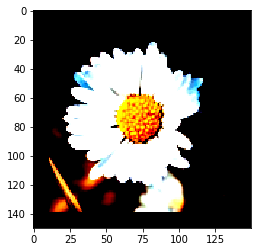

In [0]:
#Tratamiento de la imagen para ingreso al modelo
img_t = preprocess(img) #Se generan en la imagen todas las transformaciones definididas anteriormente con tamaño [3, 299, 299]
batch = torch.unsqueeze(img_t, 0) #se agrega una dimension adicional porque allí es donde se albergará la img transformada
print(img_t.shape, batch.shape)
#cada uno de los parametros de permute son dimensiones y el respectivo orden
plt.imshow(img_t.permute(1, 2, 0)) #imshow - Muestra la imagen ya transformada ; img_t.permute - Rota la imagen para poder quedar en la forma requerida, pasando de [3, 299, 299] a [299, 299, 3] Los datos son los mismos, solo se ordena su tamaño
#al convertir la img en un tensor se transpuso entonces tengo que especificar unos ejes distintos
# esto se hace definiendo el orden con (1, 2, 0), cero es la primera columna, 1 es la segunda, y 2 es la tercera, recordar que en python el indice empieza desde cero.

In [0]:
#Se evalua el modelo
model.eval() #Inicializa el modelo para iniciar luego la validación
out = model(batch) #Se genera la salida en base a la entrada generada
out

tensor([[-2.0264e+00, -1.3247e+00,  2.6723e+00, -3.4387e-01, -1.1390e+00,
         -1.9628e-01, -1.0141e+00, -1.5284e-02, -1.5989e-01,  2.4969e+00,
         -6.0648e-01, -3.4763e+00, -1.3528e+00,  4.1587e+00, -9.2473e-01,
         -3.1239e+00, -4.9102e+00,  1.9193e+00,  1.1760e-01,  2.2658e+00,
         -1.8672e+00, -3.0890e+00,  4.0855e+00, -8.6965e-01, -4.0497e+00,
         -3.2077e+00, -9.8243e-01, -2.3732e+00,  9.2939e-02,  2.3074e-01,
          5.7171e-01, -1.7518e+00, -8.4695e-01,  8.6104e-02,  3.4771e-01,
         -3.0014e-01,  1.6622e+00, -1.3532e+00, -8.1817e-01, -2.1871e+00,
         -2.3774e+00, -7.9971e-01, -4.1955e+00, -1.6344e+00, -1.2896e+00,
         -3.5986e+00, -1.8461e+00, -1.2369e+00, -1.4623e+00, -8.5811e-01,
          2.5816e-01,  1.0508e+00,  4.6851e-01,  4.4169e-01,  6.0009e-01,
         -2.7604e-01, -3.6149e-01,  1.7480e+00,  2.8252e+00, -1.4021e+00,
         -3.9458e-01,  7.8372e-01, -1.4342e+00, -1.1813e+00, -9.1421e-01,
         -3.1722e+00,  6.0009e-02,  2.

In [0]:
#Se obtienes las etiquetas de las salidas generadas y se asigna a la variable labels
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt') #Se guarda el archivo donde están todas las etiquetas, esto es, el nombre de los objetos, ejemplo "golden retriever, Labrador retriever" etc.
with open('labels.txt') as f: #Se abre el archivo .txt y se crea un arreglo con estos nombres con la siguiente línea
    labels = [line.strip() for line in f.readlines()] #line.strip - elimina los espacios en los extremos; f.readlines - Lee linea por linea el archivo

In [0]:
#para darle sentido a todos los números del tensor usamos la función max
#la salida de max son 2, sin embargo solo nos intesa el index
_, index = torch.max(out, 1) #Retorna del tensor out, la posicion de la probabilidad mayor, recordar que se define 0 o 1, según el tensor, en este caso deseamos revisar el mayor valor de una fila completa que es el arreglo de salidas de la neurona de salida, por eso se utiliza 1, si el tensor tuviera múltiples salidas, y estas estuvieran en forma de columna, debemos usar el 0
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 #Se utiliza la función softmax la cual nos garantiza que la probabilidad este entre 0 y 1, documentación en: https://pytorch.org/docs/stable/nn.html      y sobre la dimensión a usar -> https://stackoverflow.com/questions/49036993/pytorch-softmax-what-dimension-to-use/49039412#49039412
labels[index[0]], percentage[index[0]].item()  #Segun el indice donde se encuentra el mayor porcentaje se imprime la etiqueta de dicha neurona de salida

('daisy', 100.0)

In [0]:
#para ver las otras predicciones
_, indices = torch.sort(out, descending= True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

daisy 100.0
pill bottle 4.669295172732291e-09
carpenter's kit, tool kit 6.955288567311868e-10
can opener, tin opener 6.659718609913767e-11
toilet seat 5.2673664041602564e-11


# Trabajando con datasets

---



In [0]:
data_path = 'data/' # se define la ruta donde se va almacenar
#se va a trabajar con el dataset CIFAR10
#se tiene un data set para entrenamiento y otro para validar
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
#things we can recognize
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']


In [0]:
len(dataset)

50000

In [0]:
img, label = dataset[50]
#img description, label, search label into classes
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F3B12B68DD8>, 9, 'truck')

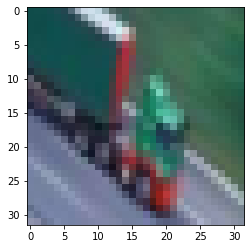

In [0]:
#la img es de 32x32, es mejor trabajar con resoluciones bajas
#esto permite trabajar más rapido y para que el rendimiento en el entrenamiento sea mayor 
plt.imshow(img)

In [0]:
#creamos la var_funcion para trasnformar a tensor
tensor_transform = transforms.ToTensor()

#transformamos la img a tensor
img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F3B12B68DD8>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

In [0]:
#ahora se transforma el dataset completo a tensor
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())


Files already downloaded and verified


In [0]:
#ahora que buscamos la img y la etiqueta nos encontramos con el 
#resultado que nos ofrece el dataset en forma de tensor
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [0]:
#los valores van a oscilar entre 0 y 1
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

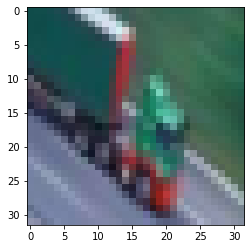

In [0]:
#if we want show image, we need execute a permute
#recordemos que al hacer las transformaciones las columnas 
#cambian de lado, por tal motivo hay que poner la permutación
#de lo contrario la función imshow no entenderia
plt.imshow(img.permute(1, 2, 0))

In [0]:
#se hace el mismo proceso para todo el dataset
#esta representación la queremos para todo el dataset
#se estan convirtiendo todas las imgs al stack para poder trabajar
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)


In [0]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [0]:
#tener las imgs en el stack nos permite
#calcular la media y la desviación 
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [0]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [0]:
#other form to realize transform 
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])

In [0]:
#ahora utilizamos la transformación que incluye la normalización de los datos
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'truck'

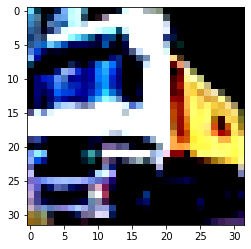

In [0]:
img_transformed,label = dataset[1]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]